## Importando bibliotecas necessárias

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', None)

## Leitura do dataset para treinamento como DataFrame

In [4]:
train_base = pd.read_csv('../datasets/credit_01/train.gz', compression='gzip', header=0)

#### Entendendo algumas propriedades da base

In [5]:
train_base.shape

(101128, 151)

In [6]:
train_base.describe()

,TARGET,IDADE,VAR6,VAR7,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR37,VAR39,VAR40,VAR41,VAR42,VAR44,VAR46,VAR47,VAR141,VAR145,VAR146,VAR147,ID
count,101128.000000,89534.000000,98293.000000,98293.000000,62409.000000,54908.000000,12995.000000,79717.000000,48955.000000,37577.000000,12995.000000,79717.000000,48955.000000,9522.000000,13047.000000,49022.000000,12995.000000,81443.000000,48955.000000,821.000000,847.000000,10742.000000,20752.000000,10742.000000,20789.000000,101063.000000,98346.000000,98620.000000,89540.000000,350.000000,261.000000,101128.000000,101128.000000,544.000000,139.000000,101128.000000,101128.000000
mean,0.792362,42.161148,-14.428152,-45.899547,0.235863,0.224095,0.317799,0.147905,0.185065,2.066357,2.143873,0.978527,1.238536,0.046674,0.348873,0.212598,0.088960,0.080194,0.061975,0.354703,0.017163,0.004070,0.144692,0.194746,151.043629,0.461251,0.531664,0.631341,0.504678,1773.255286,7115.369770,0.256144,1854.443649,4270.117169,1832.863094,101.842121,165307.238450
std,0.405618,15.260838,8.993989,7.514249,0.627456,0.258586,0.242797,0.124041,0.195153,3.212567,2.170855,0.496021,1.118399,0.124618,0.192653,0.176738,0.132423,0.138878,0.126993,0.224970,0.031262,0.038349,0.149172,0.160380,82.682134,0.144176,0.115784,0.222544,0.069795,2192.469774,5062.132086,0.406337,922.609943,4406.126548,2902.853563,0.539291,95357.686553
min,0.000000,18.014000,-33.521563,-72.900276,-4.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.002740,0.002740,0.002740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.049309,0.208688,0.000000,0.012339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000
25%,1.000000,29.962000,-22.832742,-49.903564,0.000000,0.045000,0.057000,0.102000,0.078000,0.250000,0.495890,0.503899,0.347735,0.000000,0.250000,0.125000,0.011000,0.000000,0.000000,0.167000,0.000000,0.000000,0.042000,0.125000,102.000000,0.364124,0.448203,0.440762,0.463579,642.000000,3846.070000,0.000000,1510.234174,1673.842500,0.000000,102.000000,82952.500000
50%,1.000000,39.860000,-13.035421,-46.574773,0.000000,0.127000,0.321000,0.127000,0.111000,0.833333,0.819178,1.054795,1.136986,0.011000,0.250000,0.125000,0.043000,0.034000,0.000000,0.333000,0.000000,0.000000,0.104000,0.125000,134.000000,0.462267,0.510191,0.541731,0.496036,769.000000,5449.830000,0.003000,1627.157652,3024.480000,937.000000,102.000000,165196.000000
75%,1.000000,53.093000,-6.358850,-39.030739,0.000000,0.286000,0.511000,0.154000,0.152500,2.416667,4.075343,1.391781,1.457534,0.033000,0.500000,0.250000,0.096000,0.086000,0.065000,0.500000,0.033000,0.000000,0.188000,0.250000,182.000000,0.558383,0.582358,0.898000,0.522683,1800.600000,9536.860000,0.420000,1820.670284,5393.420000,2235.775000,102.000000,247872.250000
max,1.000000,106.904000,4.478585,-32.429516,4.000000,1.000000,1.000000,1.000000,1.000000,15.999999,8.999999,2.471023,7.406250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000,1.000000,1.000000,1.000000,852.000000,0.970921,0.920685,1.000000,0.910865,17374.940000,30262.370000,1.000000,46685.420000,46685.420000,17229.200000,102.000000,330581.000000


### Head do dataframe

##### Percebe-se que, embora o dataset esteja mascarado, algumas features se mostram entendíveis. Além das datas de registro (REF_DATE), tem-se: (VAR2) representando o sexo dos pagadores, (VAR5) representando o estado de cada registro, bem como a idade de cada um (IDADE). No entanto, as demais variáveis com dtype float ou categóricas não nos permitem fazer uma boa suposição sobre. Inicialmente, muitas colunas categorizadas com as mesmas classes e bastantes com valores nulos. 

Nesse sentido, é interessante inicialmente verificar quais colunas tem um percentual de valores nulos maior que 15% em relação ao total por coluna.

In [7]:
train_base.head()

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-16 00:00:00+00:00,1,F,76.126,NaN,SP,-23.568523,-46.804297,C,E,BAIXA,2.0,0.305,NaN,0.146,0.138,NaN,NaN,0.503899,0.347735,NaN,NaN,0.250,NaN,0.052,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624806,0.480278,0.526963,0.761115,NaN,NaN,NaN,NaN,1.000,NaN,S,N,N,S,N,N,N,S,N,N,N,N,S,N,S,S,N,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,MEDIA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,BAIXISSIMA,MEDIA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,MEDIA,ALTA,ALTA,MEDIA,ALTISSIMA,ALTA,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MUITO PROXIMO,LONGE,MUITO LONGE,MEDIO,MEDIO,LONGE,LONGE,LONGE,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,MUITO PROXIMO,4094.377623,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,123791
1,2017-02-07 00:00:00+00:00,1,NaN,NaN,NaN,SP,-23.189738,-46.815943,NaN,E,MEDIA,0.0,0.205,NaN,0.105,0.114,3.833333,NaN,0.128767,1.309589,NaN,NaN,0.250,NaN,0.138,0.065,NaN,NaN,NaN,NaN,NaN,NaN,DECLARACAO NAO ENVIADA,NaN,NaN,NaN,NaN,NaN,NaN,0.380323,0.389401,0.421293,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,MEDIA,ALTA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,ALTA,MEDIA,MEDIA,ALTA,ALTA,BAIXISSIMA,MEDIA,MEDIA,BAIXISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,MEDIA,MEDIA,ALTISSIMA,ALTISSIMA,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,PROXIMO,LONGE,LONGE,MEDIO,LONGE,PROXIMO,LONGE,MUITO LONGE,MEDIO,LONGE,MEDIO,LONGE,PROXIMO,MEDIO,MEDIO,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MUITO PROXIMO,1347.882336,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,246754
2,2017-03-11 00:00:00+00:00,1,NaN,NaN,NaN,PE,-7.563015,-35.013143,NaN,E,ALTISSIMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211022,0.412692,0.870564,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,ALTA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,PROXIMO,LONGE,LONGE,MUITO LONGE,LONGE,LONGE,PROXIMO,MUITO LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO PROXIMO,1428.485398,E,NaN,NaN,NaN,NaN,102,NOME INEXISTENTE#@#EMAIL INEXISTENTE,2.6.1,169817
3,2017-04-28 00:00:00+00:00,1,F,65.786,NaN,AM,-3.119028,-60

## Data cleaning e pré-processamento para futura modelagem

#### Pré-processamento inicial aplicado tanto à base de treinamento quanto a de testes.

In [8]:
def data_cleaning(base):
    ## dataframe with total of null values and their percentage value per column from the base
    miss = base.isnull().sum().sort_values(ascending=False)
    percent = base.isnull().mean().sort_values(ascending=False)
    missing = pd.concat([miss, percent], axis=1, keys=['Total', 'Percent'])
    
    ### removing columns with null percentual > 15%
    ### here, sex and age represent have approximately 11% of null values but I assume they are essencial to this dataset
    columns_to_drop = missing[missing['Percent'] > 0.15].index
    cleaned = base.drop(columns=columns_to_drop, axis=1)
    
    # in this project, it was considered data with null values irrelevant. 
    
    # select rows with null sex, age or national state to drop, 
    # assuming this is important for identifying payers and targeting them
    rows_to_drop = cleaned[(cleaned.VAR2.isnull() == True) | 
                       (cleaned.IDADE.isnull() == True) |
                       (cleaned.VAR5.isnull() == True)].index
    cleaned = cleaned.drop(index=rows_to_drop, axis=1) #

    # dropping column associated to VAR149 once its value for all rows are equal
    cleaned = cleaned.drop(columns='VAR149', axis=1)

    # removing the very few rows remaining with null values
    cleaned = cleaned.dropna()
    
    print("cleaned_base shape =", cleaned.shape)
    print("base shape =", base.shape)
    
    return cleaned

Perceptível a remoção de algumas linhas do dataset, bem como features com bastantes valores nulos

In [9]:
cleaned_train = data_cleaning(train_base)

cleaned_base shape = (86793, 111)
base shape = (101128, 151)


#### Ordenando a base de treinamento de modo ascendente em relação à coluna REF_DATE 

In [10]:
def sort_ref_date(cleaned_base):
    date_sorted = cleaned_base.sort_values(by=['REF_DATE'], ascending=True)
    date_sorted.REF_DATE = date_sorted.REF_DATE.str[0:10]
    
    return date_sorted

Aqui já se tem uma melhor visão do dataset sem valores nulos e com os registros ordenados quanto à data, começando em Janeiro e terminando em Agosto. No entanto, muitas colunas categóricas remanescem. Possível tendência a overfitting ao aplicar a modelagem com essas 110 features.

In [11]:
cleaned_train = sort_ref_date(cleaned_train)
cleaned_train.isnull().sum()

REF_DATE    0
TARGET      0
VAR2        0
IDADE       0
VAR5        0
           ..
VAR141      0
VAR142      0
VAR147      0
VAR148      0
ID          0
Length: 111, dtype: int64

In [12]:
cleaned_train.head(1)

,REF_DATE,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR9,VAR10,VAR39,VAR40,VAR41,VAR42,VAR47,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR147,VAR148,ID
95454,2017-01-02,1,M,43.011,BA,-12.919282,-38.438118,E,ALTA,0.27731,0.439807,0.437968,0.50895,0.189,S,N,N,N,N,N,N,N,N,N,N,N,S,N,N,N,N,ALTA,BAIXISSIMA,ALTA,ALTISSIMA,ALTISSIMA,MEDIA,ALTA,BAIXISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,BAIXISSIMA,ALTISSIMA,ALTA,ALTA,MEDIA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,LONGE,PROXIMO,MEDIO,LONGE,MEDIO,MUITO PROXIMO,PROXIMO,LONGE,MEDIO,LONGE,PROXIMO,MUITO PROXIMO,PROXIMO,MUITO LONGE,PROXIMO,PROXIMO,MEDIO,LONGE,MEDIO,LONGE,PROXIMO,MEDIO,PROXIMO,LONGE,PROXIMO,LONGE,MEDIO,PROXIMO,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,MUITO PROXIMO,1777.725469,E,102,EMAIL INEXISTENTE,250079


In [13]:
cleaned_train.tail(1)

,REF_DATE,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR9,VAR10,VAR39,VAR40,VAR41,VAR42,VAR47,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR147,VAR148,ID
57806,2017-08-31,0,M,47.926,PA,-1.413469,-48.473956,E,MEDIA,0.307298,0.461255,0.434128,0.430747,0.001,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,BAIXISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,BAIXISSIMA,ALTISSIMA,PROXIMO,PROXIMO,MUITO PROXIMO,PROXIMO,PROXIMO,PROXIMO,PROXIMO,PROXIMO,PROXIMO,PROXIMO,PROXIMO,PROXIMO,MEDIO,MEDIO,PROXIMO,LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,PROXIMO,MEDIO,PROXIMO,PROXIMO,PROXIMO,PROXIMO,MUITO LONGE,PROXIMO,MEDIO,MEDIO,PROXIMO,PROXIMO,LONGE,MEDIO,PROXIMO,MUITO LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,2888.550216,D,100,OPERACAO REALIZADA COM SUCESSO,214161


## Visualizando a base de treinamento, considerando as features reconhecíveis

#### Maioria dos pagadores da base tem em torno de 30 a 40 anos.

<AxesSubplot: ylabel='Frequency'>

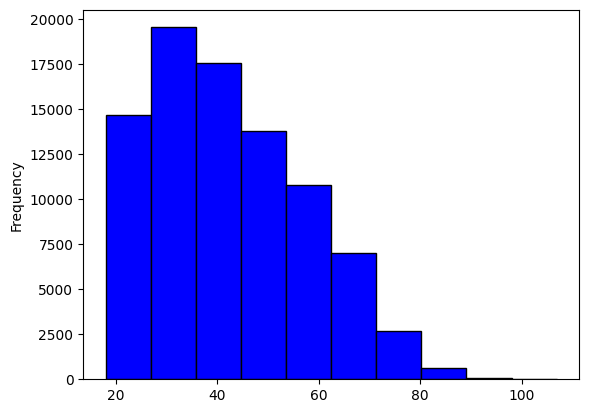

In [14]:
idades = cleaned_train.IDADE.reset_index(drop=True)
idades.plot.hist(color='blue', edgecolor='black')

#### Percentual de pagadores por estado

In [15]:
def calcula_percentual_categorias(feature, categoria):
    categoria_df = cleaned_train[cleaned_train[feature] == categoria]
    total_categoria = categoria_df[feature].value_counts().sum()
    percentual_categoria = total_categoria / cleaned_train[feature].value_counts().sum()
    return percentual_categoria

In [16]:
percentual_paulistas = calcula_percentual_categorias('VAR5', 'SP')
print("Os paulistas representam cerca de " + str(round(percentual_paulistas, 3)*100) + "% do total da base")

Os paulistas representam cerca de 16.6% do total da base


<AxesSubplot: >

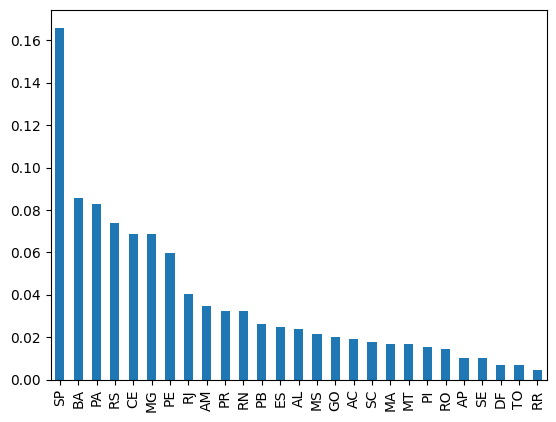

In [17]:
estados = cleaned_train.VAR5.value_counts(normalize=True)
estados.plot(kind='bar')

#### Percentual de homens e mulheres na base

###### O pré-processamento foi capaz de identificar esse possível outlier com alguma das features nula

In [18]:
print("Base de treinamento")
print(train_base.VAR2.value_counts())
print("\nBase de treinamento limpa")
print(cleaned_train.VAR2.value_counts())

Base de treinamento
F    50180
M    38591
I        1
Name: VAR2, dtype: int64

Base de treinamento limpa
F    48905
M    37888
Name: VAR2, dtype: int64


In [19]:
percentual_mulheres = calcula_percentual_categorias('VAR2', 'F')
print("As mulheres representam cerca de " + str(round(percentual_mulheres, 3)*100) + "% do total da base")

As mulheres representam cerca de 56.3% do total da base


<AxesSubplot: >

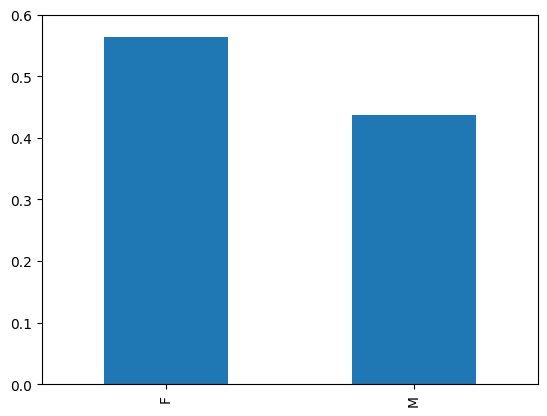

In [20]:
sexos = cleaned_train.VAR2.value_counts(normalize=True)
yticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
sexos.plot(kind='bar', yticks=yticks)

#### Distribuição das idades dos pagadores de cada estado no formato boxplot

##### O plot identifica alguns outliers. No entanto, considerando o que o dataset representa, acredito que não sejam anomalias dado que existem clientes de Financeiras com idades entre 80 e 100 anos

##### Mediana das idades próximas, indicando semelhanças também entre os primeiros e terceiros quartis de cada estado. A distribuição concentrada em torno dos 40 anos verifica o gráfico das frequênciad das idades plotado anteriormente.

<AxesSubplot: title={'center': 'IDADE'}, xlabel='[VAR5]'>

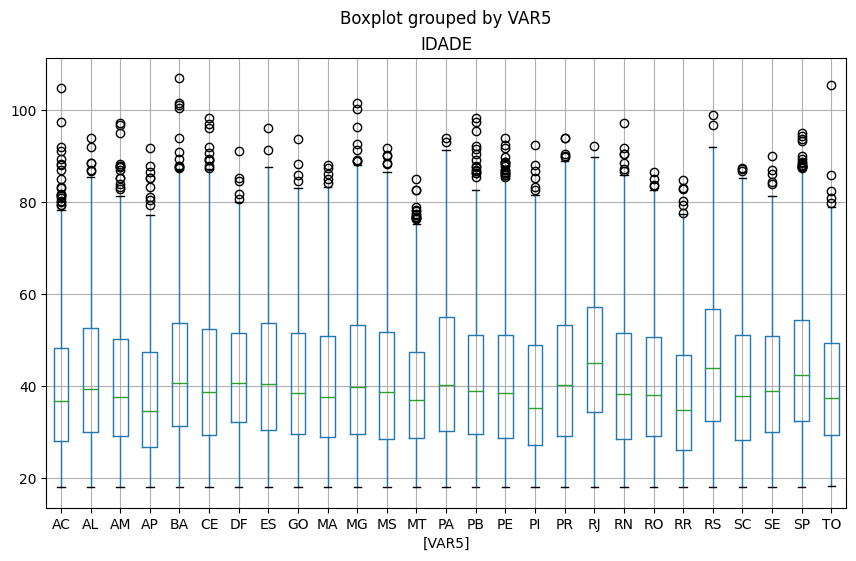

In [21]:
data = pd.concat([cleaned_train.IDADE, cleaned_train.VAR5], axis=1)
data.boxplot(by='VAR5', figsize=(10,6))

#### Gráfico em linha mostra como é o crescimento de registro de pagadores no dataset ao longo dos meses de Janeiro a Agosto.

cleaned dataset shape:  (86793, 111)


<AxesSubplot: xlabel='REF_DATE'>

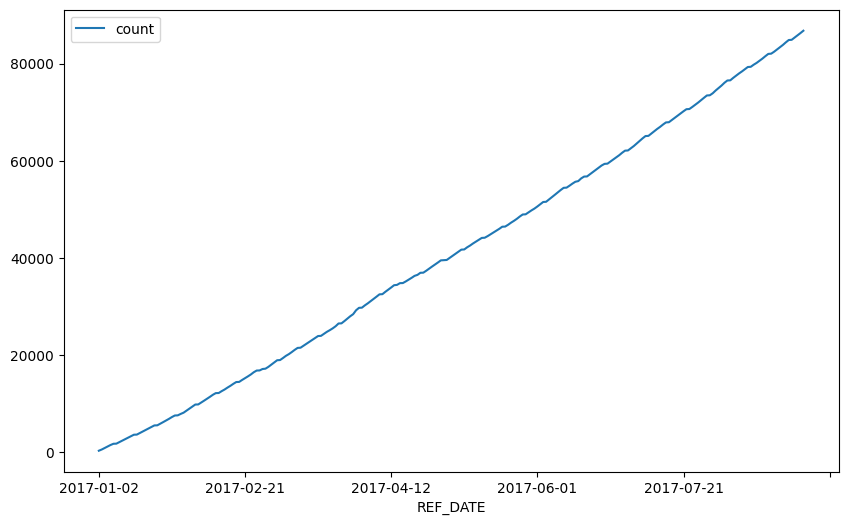

In [22]:
data = pd.DataFrame(cleaned_train.REF_DATE.value_counts().reset_index().values, columns=['REF_DATE', 'count'])
data = data.sort_values(by=['REF_DATE'], ascending=True)
data['count'] = data['count'].cumsum()
print("cleaned dataset shape: ", cleaned_train.shape)
data.plot(kind='line', x='REF_DATE', y='count', figsize=(10,6))

#### Gráfico abaixo mostra como é o crescimento dos registros de pagadores a depender do sexo, de Janeiro a Agosto.

total de homens:  37888
total de mulheres:  48905


<AxesSubplot: xlabel='REF_DATE'>

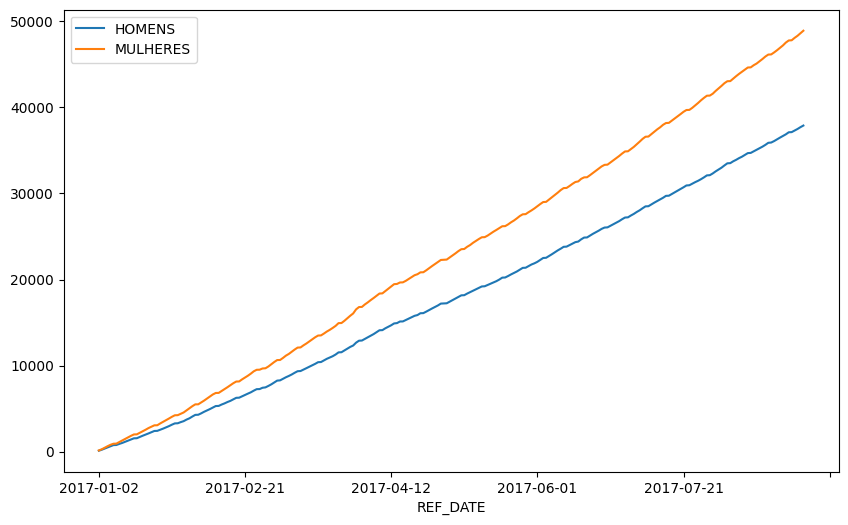

In [23]:
males = cleaned_train[cleaned_train.VAR2 == 'M']
data = pd.DataFrame(males.REF_DATE.value_counts().reset_index().values, columns=['REF_DATE', 'HOMENS'])
data = data.sort_values(by=['REF_DATE'], ascending=True)
data['HOMENS'] = data['HOMENS'].cumsum()
print("total de homens: ", males.shape[0])
ax= data.plot(kind='line', x='REF_DATE', y='HOMENS', figsize=(10,6))

females = cleaned_train[cleaned_train.VAR2 == 'F']
data = pd.DataFrame(females.REF_DATE.value_counts().reset_index().values, columns=['REF_DATE', 'MULHERES'])
data = data.sort_values(by=['REF_DATE'], ascending=True)
data['MULHERES'] = data['MULHERES'].cumsum()
print("total de mulheres: ", females.shape[0])
data.plot(kind='line', x='REF_DATE', y='MULHERES', figsize=(10,6), ax=ax)

#### Gráfico abaixo mostra o comportamento da idade média de pagadores do dataset, ao decorrer dos meses de Janeiro a Agosto

##### Tendência do gráfico confirma o comportamento dos boxplots de idade por estado e o plot de frequências das idades mostrados anteriormente.

Descrição da feature idade


count    86793.000000
mean        42.366373
std         15.200582
min         18.014000
25%         30.271000
50%         40.110000
75%         53.241000
max        106.904000
Name: IDADE, dtype: float64

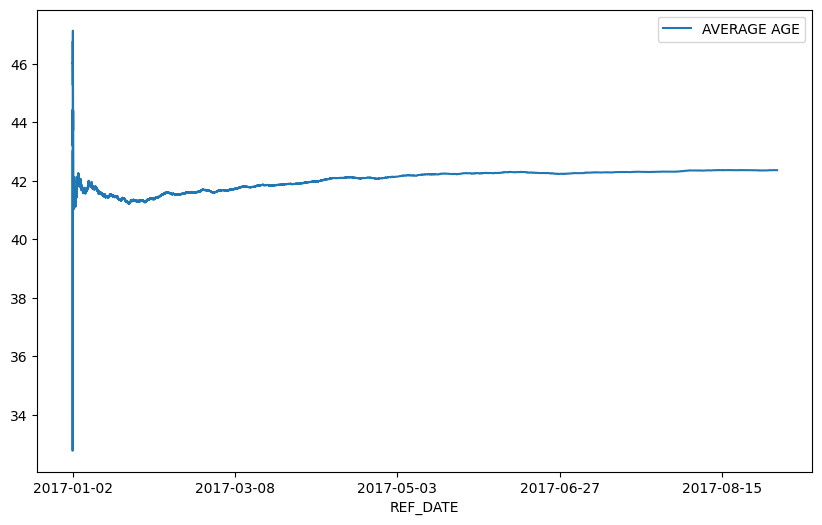

In [24]:
data = pd.concat([cleaned_train.REF_DATE, cleaned_train.IDADE], axis=1)
data = data.sort_values(by=['REF_DATE'], ascending=True)
data['counter'] = range(1, len(data)+1, 1)
data = data.rename(columns={'IDADE': 'AVERAGE AGE'})
data['AVERAGE AGE'] = data['AVERAGE AGE'].cumsum() / data.counter
data.plot(kind='line', x='REF_DATE', y='AVERAGE AGE', figsize=(10,6))

print("Descrição da feature idade")
cleaned_train.IDADE.describe()

#### Boxplots referentes à distribuição de idades entre homens e mulheres. Percebe-se que a média de idade tem a mesma tendência entre ambos.

<AxesSubplot: title={'center': 'IDADE'}, xlabel='[VAR2]'>

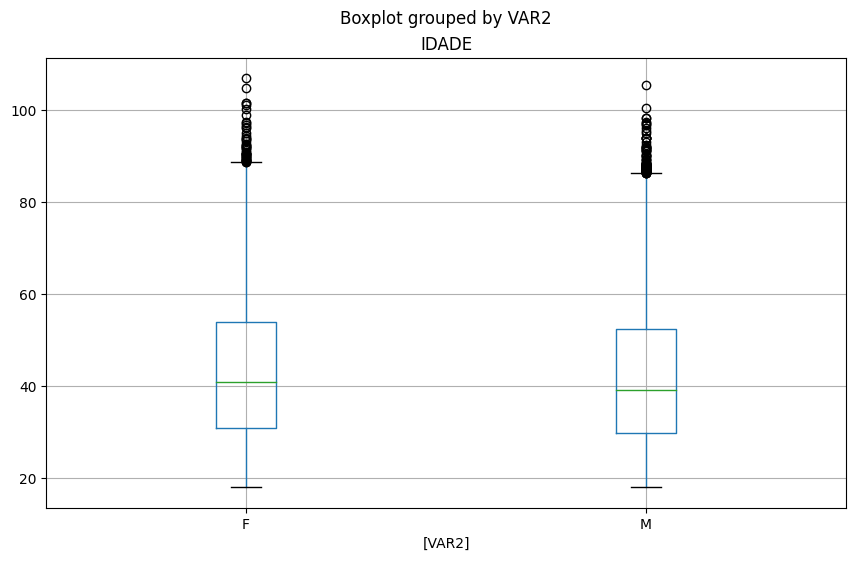

In [25]:
data = pd.concat([cleaned_train.IDADE, cleaned_train.VAR2], axis=1)
data.boxplot(by='VAR2', figsize=(10,6))

## Data transforming

#### Selecionando as features com valores categóricos para transformá-los em inteiros

In [26]:
def categorical_transform(cleaned_base):
    for feature in cleaned_base:
        dtype = cleaned_base[feature].dtypes
        if dtype.name == 'object' or dtype.name == 'category':
            cleaned_base[feature] = pd.Categorical(cleaned_base[feature])
            cleaned_base[feature] = cleaned_base[feature].cat.codes

#### Agora, a visualização da base de dados é inteiramente numérica para que o modelo de treinamento possa ser aplicado.

In [27]:
categorical_transform(cleaned_train)
cleaned_train.head()

,REF_DATE,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR9,VAR10,VAR39,VAR40,VAR41,VAR42,VAR47,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR147,VAR148,ID
95454,0,1,1,43.011,4,-12.919282,-38.438118,4,0,0.277310,0.439807,0.437968,0.508950,0.189,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,1,4,0,2,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,2,1,0,0,3,1,0,0,0,1,4,1,1,0,0,4,1,0,1,3,4,0,1,0,4,3,4,0,3,4,1,0,1,0,4,1,4,0,4,0,1,4,1,4,1,0,0,3,1777.725469,4,102,0,250079
87074,0,1,0,21.200,12,-10.657291,-51.570310,4,1,0.328616,0.443699,0.953299,0.461682,1.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,2,1,4,2,2,2,2,2,2,2,3,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,0,0,2,2,2,2,2,2,2,3,2,2,2,3,2,2,2,2,2,2,2,2,1428.485398,4,102,1,253973
39484,0,0,0,24.753,8,-17.894202,-51.710448,4,2,0.264099,0.494005,0.490871,0.457225,1.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,3,0,3,0,2,0,3,0,3,0,3,2,0,1,0,3,2,3,0,0,0,0,1,1,0,0,2,0,0,3,3,1,1,1,1,1,1,4,1,0,4,2,1,1,1,4,4,2,1,1,2,2,0,2,1,4,1,4,1,2,1,1,1,2,1,1,0,4,0,1,1,4,0,1415.431910,4,102,1,245427
53793,0,1,0,38.195,9,-4.953936,-47.503077,4,1,0.546427,0.506563,0.932704,0.512888,1.000,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,3,2,2,1,3,2,2,2,2,2,2,2,3,1,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,0,2,3,2,2,2,1,2,2,2,2,1756.485120,4,102,1,25982
91478,0,0,1,41.981,18,-22.462681,-42.652839,4,0,0.247783,0.492363,0.573457,0.495069,0.913,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,2,2,2,3,4,2,2,3,3,2,2,3,2,2,2,2,2,0,3,3,4,4,3,1,2,2,2,3,2,4,2,2,4,1,2,0,4,4,0,4,0,4,0,0,4,1,2,0,0,1,4,1,1,0,3,4,4,4,4,1,1,4,2,0,4,4,2,2,4,1,0,0,2,2,1815.143850,4,102,1,290925


In [28]:
## checando os tipos de dados no novo dataframe
cleaned_train.dtypes
## apenas int e floats

REF_DATE      int16
TARGET        int64
VAR2           int8
IDADE       float64
VAR5           int8
             ...   
VAR141      float64
VAR142         int8
VAR147        int64
VAR148         int8
ID            int64
Length: 111, dtype: object

#### Separando o dataset em X_train e y_train (TARGETS) e utilizando feature scaling como pré-processamento para que o algoritmo de aprendizagem possa convergir bem.

In [29]:
def prepare_data_vectors(cleaned_base):
    ## separating X feature vector from y targets
    y = cleaned_base['TARGET']
    X = cleaned_base.loc[:, cleaned_base.columns != 'TARGET']

    return X, y

In [30]:
X_train, y_train = prepare_data_vectors(cleaned_train)

In [31]:
from sklearn.preprocessing import MinMaxScaler

def scale_features(X):
    scaler = MinMaxScaler()
    
    # applying minMaxScaling to X feature vector
    X = scaler.fit_transform(X)
    
    # transforming back to dataframe
    X = pd.DataFrame(X)
    return X

In [32]:
X_train = scale_features(X_train)

#### Visualizando as input features e o target vector.

In [33]:
y_train.value_counts()

1    69768
0    17025
Name: TARGET, dtype: int64

In [34]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
0,0.0,1.0,0.281213,0.153846,0.542163,0.851532,1.0,0.00,0.247394,0.324607,0.437968,0.552695,0.189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.333333,0.333333,1.00,0.000000,0.666667,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.00,0.5,0.000000,0.333333,0.333333,0.000000,0.00,0.00,0.000000,0.0,0.00,0.333333,1.0,0.333333,0.0,0.0,1.000000,0.333333,0.00,0.0,0.000000,0.25,1.00,0.25,0.25,0.00,0.0,1.0,0.25,0.00,0.25,0.75,1.0,0.0,0.25,0.00,1.00,0.75,1.00,0.0,1.000000,1.00,0.25,0.00,0.25,0.00,1.00,0.25,1.00,0.00,1.0,0.00,0.25,1.0,0.25,1.00,0.25,0.00,0.0,0.75,0.037998,1.0,1.0,0.0,0.756483
1,0.0,0.0,0.035842,0.461538,0.601689,0.527046,1.0,0.25,0.303064,0.330073,0.953299,0.500089,1.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.666667,1.0,0.666667,0.666667,0.666667,0.75,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.50,1.0,0.666667,0.666667,0.666667,0.666667,0.75,0.75,0.666667,1.0,1.00,0.666667,1.0,0.666667,1.0,0.5,0.666667,0.666667,0.75,1.0,0.666667,0.50,0.50,0.50,0.50,0.50,0.5,0.5,0.50,0.50,0.50,0.50,0.5,0.5,0.50,0.75,0.50,0.50,0.00,0.0,0.666667,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.50,0.5,0.75,0.50,0.5,0.50,0.50,0.50,0.50,0.5,0.50,0.030516,1.0,1.0,0.5,0.768262
2,0.0,0.0,0.075813,0.307692,0.411245,0.523584,1.0,0.50,0.233059,0.400728,0.490871,0.495129,1.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,1.000000,0.000000,1.000000,0.00,0.666667,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.666667,0.000000,0.25,0.0,1.000000,0.666667,1.000000,0.000000,0.00,0.00,0.000000,1.0,0.25,0.000000,0.0,0.666667,0.0,0.0,1.000000,1.000000,0.25,1.0,0.333333,0.25,0.25,0.25,1.00,0.25,0.0,1.0,0.50,0.25,0.25,0.25,1.0,1.0,0.50,0.25,0.25,0.50,0.50,0.0,0.666667,0.25,1.00,0.25,1.00,0.25,0.50,0.25,0.25,0.25,0.5,0.25,0.25,0.0,1.00,0.00,0.25,0.25,1.0,0.00,0.030237,1.0,1.0,0.5,0.742410
3,0.0,0.0,0.227033,0.346154,0.751777,0.627544,1.0,0.25,0.539401,0.418366,0.932704,0.557078,1.000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.000000,0.666667,0.666667,0.75,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.75,1.0,0.666667,0.666667,0.666667,0.666667,0.75,0.50,0.666667,1.0,0.75,0.666667,1.0,0.666667,1.0,0.5,0.666667,0.666667,0.75,1.0,0.666667,0.75,0.50,0.50,0.50,0.50,0.5,0.5,0.50,0.50,0.50,0.50,0.5,0.5,0.50,0.50,0.50,0.50,0.00,0.0,0.666667,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.5,0.75,0.50,0.5,0.50,0.25,0.50,0.50,0.5,0.50,0.037543,1.0,1.0,0.5,0.078592
4,0.0,1.0,0.269625,0.692308,0.291022,0.747390,1.0,0.00,0.215355,0.398422,0.573457,0.537247,0.913,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.666667,0.666667,1.000000,1.00,0.666667,0.666667,1.000000,1.000000,0.666667,0.666667,1.000000,0.666667,0.666667,0.50,1.0,0.666667,0.000000,1.000000,1.000000,1.00,1.00,1.000000,1.0,0.50,0.666667,1.0,1.000000,1.0,1.0,0.666667,0.666667,1.00,1.0,0.666667,0.00,1.00,1.00,0.00,1.00,0.0,1.0,0.00,0.00,1.00,0.25,0.5,0.0,0.00,0.25,1.00,0.25,0.25,0.0,1.000000,1.00,1.00,1.00,1.00,0.25,0.25,1.00,0.50,0.00,1.0,1.00,0.50,0.5,1.00,0.25,0.00,0.00,0.5,0.50,0.038799,1.0,1.0,0.5,0.880041


## Treinando X_train e y_train inicial com três modelos diferentes:

In [35]:
X_train.shape

(86793, 110)

In [36]:
y_train.shape

(86793,)

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow import keras
import tensorflow as tf

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    model = Sequential()
    model.add(Dense(16, activation='relu', input_dim=20))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias)) 

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=METRICS)

    return model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## saga solver was pointed out as a good fit for a large dataset
lr = LogisticRegression(max_iter=100, solver='saga')
lr.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

#### Plotar a confusion matrix dado X input features e y target vector

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

def plot_confusion_matrix(model, X, y):
    y_pred = model.predict(X)

    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot()
    plt.title(type(model).__name__)
    plt.show()
    
    print("Precision score: ", precision_score(y, y_pred))
    print("Recall score: ", recall_score(y, y_pred))
    print("F1 score: ", f1_score(y, y_pred))
    print("Accuracy score: ", accuracy_score(y, y_pred))
    print("\n\n")

##### Inicialmente, o modelo de logistic regression conta com uma taxa de false positives muito alta. No caso desse modelo do desafio, o score a ser escolhido precisa ser o de precisão. O modelo a ser escolhido precisa ser mais sensível à precisão dado que as consequências de prever como bom pagador um mau pagador são maiores quando comparadas as de falsos negativos. Assim, procuramos maximizar o precision score procurando minimizar a taxa de falsos positivos em um trade-off com os falsos negativos.

##### Os outros dois modelos baseados em árvores de decisão mostram uma provável tendência a overfitting, uma vez que se moldam MUITO bem à base de treinamento.

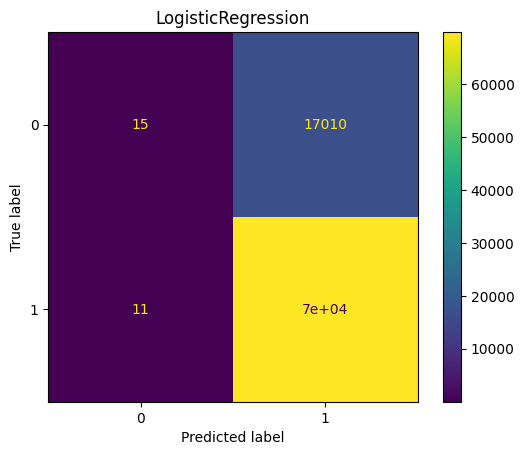

Precision score:  0.8039577258635195
Recall score:  0.9998423345946565
F1 score:  0.8912639345833201
Accuracy score:  0.8038897146083209





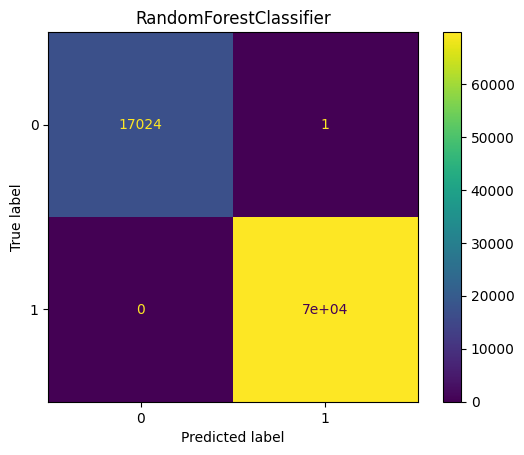

Precision score:  0.9999856669867706
Recall score:  1.0
F1 score:  0.9999928334420262
Accuracy score:  0.9999884783335061





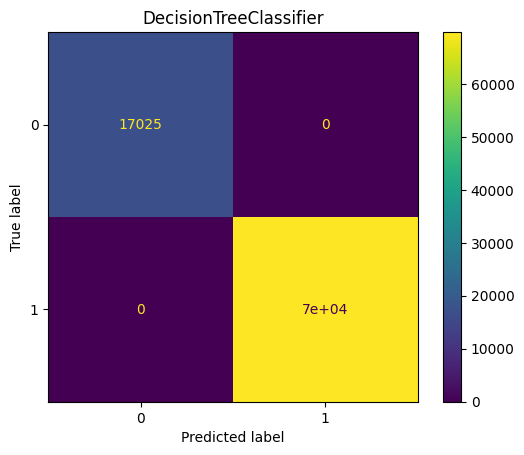

Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
Accuracy score:  1.0





In [40]:
plot_confusion_matrix(lr, X_train, y_train)
plot_confusion_matrix(rfc, X_train, y_train)
plot_confusion_matrix(dtc, X_train, y_train)

## Leitura da base de testes para testagem do modelo e definição dos scores.

In [41]:
test_base = pd.read_csv('../datasets/credit_01/test.gz', compression='gzip', header=0, low_memory=False)

In [42]:
test_base.head()

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-03-25 00:00:00+00:00,1,M,43.893,NaN,PR,-25.495571,-49.245499,D,E,MEDIA,1.0,0.182,0.602,0.597,0.618,0.250000,1.780822,1.076712,5.057534,NaN,0.75,0.125,0.309,0.069,0.097,NaN,NaN,NaN,NaN,NaN,CAIXA ECONOMICA FEDERAL,SALDO INEXISTENTE,NaN,NaN,NaN,NaN,NaN,NaN,0.661039,0.573539,0.479370,0.444049,NaN,NaN,NaN,NaN,0.006,NaN,S,N,N,N,N,N,N,S,S,N,N,N,N,N,N,N,N,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,BAIXISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,BAIXISSIMA,ALTA,MEDIO,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,MEDIO,PROXIMO,PROXIMO,MEDIO,LONGE,MEDIO,MEDIO,LONGE,MUITO LONGE,MEDIO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MUITO PROXIMO,3970.113648,C,NaN,NaN,NaN,NaN,100,OPERACAO REALIZADA COM SUCESSO,2.6.1,82396
1,2017-08-31 00:00:00+00:00,1,F,31.559,NaN,RS,-30.109092,-51.323827,E,E,ALTISSIMA,0.0,0.055,0.208,0.220,0.191,NaN,2.306849,0.690411,2.189041,NaN,0.25,0.375,0.011,0.448,0.065,NaN,NaN,NaN,NaN,NaN,NaN,DECLARACAO NAO ENVIADA,NaN,NaN,NaN,NaN,NaN,NaN,0.429179,0.731167,0.756760,0.452576,NaN,NaN,NaN,NaN,0.001,S,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,ALTISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,LONGE,MEDIO,LONGE,LONGE,MUITO LONGE,LONGE,LONGE,LONGE,LONGE,MUITO PROXIMO,LONGE,LONGE,PROXIMO,MUITO LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,MEDIO,MUITO PROXIMO,MUITO LONGE,LONGE,LONGE,MUITO PROXIMO,MUITO PROXIMO,MUITO LONGE,MUITO PROXIMO,MEDIO,LONGE,LONGE,LONGE,MUITO PROXIMO,1513.227400,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,302199
2,2017-03-30 00:00:00+00:00,1,M,42.918,NaN,SP,-23.561438,-46.626433,E,E,ALTA,0.0,NaN,NaN,0.118,0.089,NaN,NaN,0.268493,1.158904,NaN,NaN,0.125,NaN,0.103,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208445,0.631400,0.617397,0.447420,NaN,NaN,NaN,NaN,0.001,NaN,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,MEDIO,MEDIO,MEDIO,MEDIO,LONGE,PROXIMO,MEDIO,MEDIO,PROXIMO,MEDIO,MEDIO,PROXIMO,PROXIMO,PROXIMO,MEDIO,MEDIO,MEDIO,LONGE,MUITO LONGE,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,PROXIMO,LONGE,LONGE,PROXIMO,PROXIMO,PROXIMO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,1815.143850,E,NaN,NaN,NaN,NaN,

#### Vamos aplicar as mesmas técnicas de limpeza e transformação utilizadas no pré-processamento da base de treinamento. No entanto estamos fazendo isso de maneira separada para evitar data leaking.

In [43]:
cleaned_test = data_cleaning(test_base)
cleaned_test = sort_ref_date(cleaned_test)
categorical_transform(cleaned_test)
cleaned_test

cleaned_base shape = (42792, 111)
base shape = (49810, 151)


,REF_DATE,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR9,VAR10,VAR39,VAR40,VAR41,VAR42,VAR47,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR147,VAR148,ID
9847,0,1,0,36.178,2,-3.052850,-59.979285,4,4,0.470495,0.371619,0.333542,0.500668,0.018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,0,1,3,1,1,1,3,3,0,0,0,1,1,0,1,0,1,1,1,0,1,1,1,0,1,0,0,3,1,1,1,0,1,4,4,1,1,0,1,1,4,1,4,0,0,1,1,4,1,2,0,2,1,4,4,1,1,2,1,4,4,4,1,4,4,1,2,4,1,0,0,1478.716854,4,102,0,185611
7772,0,1,0,19.430,4,-12.943648,-38.491067,4,2,0.437879,0.391124,0.417244,0.525230,0.000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,1,4,1,4,1,1,0,1,1,4,1,4,4,4,4,1,4,4,4,0,3,4,3,1,1,4,4,4,1,1,4,4,1,4,1,4,1,1,1,1,1347.882336,4,102,1,205533
6009,0,1,1,65.929,25,-23.552837,-46.659058,4,0,0.596540,0.733797,0.705135,0.695265,1.000,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,4,4,4,4,4,4,4,4,3,1,4,3,4,4,1,1,1,0,0,1,4,4,4,0,1,4,1,1,1,4,1,4,1,1,4,4,4,4,1,1891.584279,4,102,0,70862
27210,0,0,1,27.732,7,-20.332805,-40.366186,4,0,0.444816,0.472439,0.454589,0.611242,0.026,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,0,0,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,1,4,4,4,1,4,0,4,0,0,1,4,4,1,1,4,1,1,4,0,1,4,4,0,1,0,2,4,1,1,3,4,1,4,4,4,1,1,1,1,1521.223159,4,102,0,251374
2661,0,1,0,30.490,10,-19.740976,-47.888660,4,4,0.243149,0.510381,0.402094,0.451914,0.590,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,3,2,0,1,0,0,0,3,2,0,0,2,2,1,1,0,2,0,1,0,1,0,1,1,0,2,0,2,0,0,3,1,1,0,0,0,1,2,1,0,1,1,0,0,0,2,0,2,4,4,2,1,0,2,1,4,1,1,1,2,4,0,0,0,4,4,4,4,0,0,0,0,0,1538.279711,4,102,1,207802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18990,241,1,0,40.148,0,-7.627998,-72.676149,4,1,0.519672,0.789704,0.916013,0.494687,1.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,2,1,3,2,2,2,2,3,2,2,3,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1603.798248,4,102,0,100767
24346,241,1,1,31.926,25,-23.459346,-46.523800,4,4,0.386468,0.495616,0.515433,0.449500,0.001,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,4,0,0,0,0,1,0,1,4,1,1,0,0,1,4,4,1,1,4,4,1,3,4,1,1,4,1,4,1,1,1,0,0,1,4,1,1,1,1,4,1,1,4,1,1,4,1,0,4,4,4,1,4,2717.778235,3,102,0,330230
42430,241,1,0,56.011,13,-1.061619,-46.783011,4,1,0.646119,0.418465,0.936108,0.522879,1.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,2,1,3,2,2,2,2,3,2,2,3,1,2,2,2,2,2,2,0,2,2,0,2,2,2,2,0,3,2,2,1,0,3,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,0,2,2,1778.081050,4,102,0,258862
8176,241,1,1,32.553,25,-21.122552,-47.737565,4,4,0.625643,0.420590,0.333933,0.497406,0.003,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,1,0,3,3,4,3,2,3,3,2,2,3,3,2,4,1,3,0,2,3,0,4,3,1,4,3,2,3,0,4,1,3,0,1,2,4,0,0,0,0,1,1,0,0,0,0,2,0,0,1,4,1,0,0,2,0,0,0,0,1,2,0,0,0,0,0,4,0,4,0,0,0,0,0,2935.461617,3,100,2,312493


#### Separando em X_test e y_test e utilizando feature scaling assim como na base de treinamento.

In [44]:
X_test, y_test = prepare_data_vectors(cleaned_test)
X_test = scale_features(X_test)

In [45]:
y_test.value_counts()

1    34369
0     8423
Name: TARGET, dtype: int64

#### Scaled features da base de testes

In [86]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
0,0.0,0.0,0.216282,0.076923,0.801805,0.339203,1.0,1.0,0.439547,0.205228,0.339626,0.552696,0.018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.000000,0.666667,0.000000,0.25,1.000000,0.333333,0.333333,0.333333,1.000000,1.000000,0.000000,0.000000,0.000000,0.25,0.5,0.000000,0.333333,0.000000,0.333333,0.25,0.25,0.000000,1.0,0.25,0.333333,0.0,0.333333,0.0,0.00,1.000000,0.333333,0.25,1.0,0.000000,0.25,1.00,1.00,0.25,0.25,0.0,0.25,0.25,1.00,0.25,1.0,0.00,0.00,0.25,0.25,1.00,0.25,0.50,0.0,0.666667,0.25,1.00,1.00,0.25,0.25,0.5,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.25,0.5,1.00,0.25,0.00,0.00,0.047508,1.0,1.0,0.0,0.561474
1,0.0,0.0,0.016861,0.153846,0.541522,0.903315,1.0,0.5,0.403451,0.233461,0.424855,0.580176,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.333333,0.333333,0.333333,0.00,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.25,0.5,0.333333,0.333333,0.333333,0.333333,0.25,0.25,0.000000,0.0,0.25,0.333333,0.0,0.333333,0.0,0.25,0.333333,0.333333,0.25,0.0,0.333333,1.00,0.25,1.00,0.25,0.25,0.0,0.25,0.25,1.00,0.25,1.0,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.0,1.000000,1.00,0.75,0.25,0.25,1.00,1.0,1.00,0.25,0.25,1.00,1.00,0.25,1.00,0.25,1.0,0.25,0.25,0.25,0.25,0.043298,1.0,1.0,0.5,0.621739
2,0.0,1.0,0.570532,0.961538,0.262334,0.688888,1.0,0.0,0.579037,0.729480,0.717997,0.770410,1.000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.333333,0.5,0.333333,0.333333,0.333333,0.25,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.00,0.5,0.333333,0.000000,0.333333,0.333333,0.25,0.00,0.333333,0.0,0.00,0.333333,0.5,0.333333,0.5,0.00,0.333333,0.333333,0.25,0.0,0.333333,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,0.75,0.25,1.0,0.75,1.00,1.00,0.25,0.25,0.25,0.00,0.0,0.333333,1.00,1.00,1.00,0.00,0.25,1.0,0.25,0.25,0.25,1.00,0.25,1.00,0.25,0.25,1.0,1.00,1.00,1.00,0.25,0.060793,1.0,1.0,0.0,0.214352
3,0.0,1.0,0.115714,0.269231,0.347071,0.854089,1.0,0.0,0.411128,0.351165,0.462881,0.676405,0.026,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.000000,0.000000,0.333333,0.25,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.333333,0.25,0.0,0.000000,0.333333,0.333333,0.333333,0.00,0.25,0.000000,1.0,0.25,0.333333,0.0,0.333333,0.0,0.25,0.333333,0.333333,0.25,0.0,0.333333,1.00,1.00,1.00,0.25,1.00,0.0,1.00,0.00,0.00,0.25,1.0,1.00,0.25,0.25,1.00,0.25,0.25,1.00,0.0,0.333333,1.00,1.00,0.00,0.25,0.00,0.5,1.00,0.25,0.25,0.75,1.00,0.25,1.00,1.00,1.0,0.25,0.25,0.25,0.25,0.048876,1.0,1.0,0.0,0.760410
4,0.0,0.0,0.148554,0.384615,0.362646,0.656608,1.0,1.0,0.187950,0.406086,0.409429,0.498150,0.590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.000000,0.666667,0.000000,0.25,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,0.666667,0.666667,0.25,0.5,0.000000,0.666667,0.000000,0.333333,0.00,0.25,0.000000,1.0,0.25,0.000000,1.0,0.000000,1.0,0.00,0.000000,1.000000,0.25,1.0,0.000000,0.00,0.00,0.25,0.50,0.25,0.0,0.25,0.25,0.00,0.00,0.0,0.50,0.00,0.50,1.00,1.00,0.50,0.25,0.0,0.666667,0.25,1.00,0.25,0.25,0.25,0.5,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.049424,1.0,1.0,0.5,0.628602


In [87]:
neg, pos = np.bincount(cleaned_train.TARGET)
total = neg + pos
print('Examples:\n    Total: {}\n    Bad payer: {} ({:.2f}% of total)\n'.format(
    total, neg, 100 * neg / total))

Examples:
    Total: 86793
    Bad payer: 17025 (19.62% of total)



In [88]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 2.55
Weight for class 1: 0.62


In [91]:
initial_bias = np.log([pos/neg])
initial_bias

array([1.4104926])

In [92]:
X_train_under = X_train.iloc[:, range(20)]
X_test_under = X_test.iloc[:, range(20)]

In [96]:
model = make_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                336       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
868/868 [==============================] - 2s 2ms/step - loss: 0.6714 - tp: 36680.0000 - fp: 5805.0000 - tn: 11220.0000 - fn: 33088.0000 - accuracy: 0.5519 - precision: 0.8634 - val_loss: 0.6683 - val_tp: 18872.0000 - val_fp: 2961.0000 - val_tn: 5462.0000 - val_fn: 15497.0000 - val_accuracy: 0.5687 - val_precision: 0.8644
Epoch 2/10
868/868 [==============================] - 2s 2ms/step - loss: 0.6712 - tp: 37647.0000 - fp: 6054.0000 - tn: 10971.0000 - fn: 32121.0000 - accuracy: 0.5602 - precision: 0.8615 - val_loss: 0.6604 - val_tp: 19811.0000 - val_fp: 3186.0000 - val_tn: 5237.0000 - val_fn: 14558.0000 - val_accuracy: 0.5853 - val_precision: 0.8615
Epoch 3/10
868/868 [==============================] - 1s 2ms/step - loss: 0.6718 - tp: 37352.0000 - fp: 5911.0000 - tn: 11114.0000 - fn: 32416.0000 - accuracy: 0.5584 - precision: 0.8634 - val_loss: 0.6691 - val_tp: 18928.0000 - val_fp: 2971.0000 - val_tn: 5452.0000 - val_fn: 15441.0000 - val_accuracy: 0.5697 - val_precision: 0.

Text(113.9222222222222, 0.5, 'Actual label')

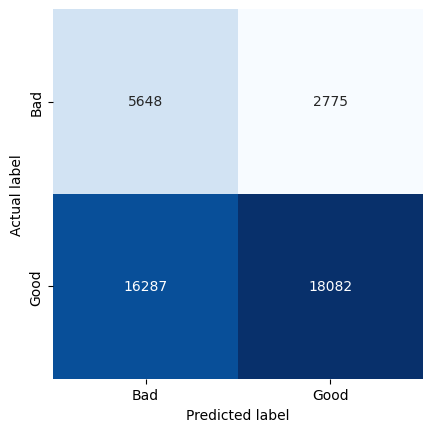

In [98]:
hist = model.fit(X_train_under, y_train, validation_data=(X_test_under, y_test), epochs=10, batch_size=100, class_weight=class_weight)

from sklearn.metrics import confusion_matrix
import seaborn as sns
 
y_predicted = model.predict(X_test_under) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Bad', 'Good']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

## Após treinados os 3 modelos, vamos plotar as matrizes de confusão alimentando-os com a base de testes.

#### Vale ressaltar que os altos scores dos três modelos mascaram um pouco a realidade de predição. Ao plotar as confusion matrixes, pode-se perceber uma tendência dos modelos de sempre prever bons pagadores.

#### O que foi suspeitado anteriormente de fato se concretiza. Os três modelos estão "overfitting the data", não se mostrando eficientes ao lidar com novos dados.  

In [ ]:
plot_confusion_matrix(lr, X_test, y_test)
plot_confusion_matrix(rfc, X_test, y_test)
plot_confusion_matrix(dtc, X_test, y_test)

## Imbalanced dataset

#### Analisando as confusion matrixes, pode-se inferir que um dos possíveis problemas dos modelos é a base de dados desbalanceada quanto às classes de TARGET. Há muito mais bons pagadores do que maus. 

#### Quanto a isso, vamos avaliar dois métodos para combater, além de remover features categóricas para evitar overfit:

#### UNDER-SAMPLING: recortar os datasets de treinamento e testagem para que a proporção do target de bons pagadores e maus pagadores fique em torno de 50%

In [ ]:
overfitting_features = ['VAR' + str(x) for x in range(49, 141, 1)]

## removendo categorical features
new_cleaned_train = cleaned_train.drop(columns=overfitting_features, axis=1)
new_cleaned_test = cleaned_test.drop(columns=overfitting_features, axis=1)

## resampling os bons pagadores e recriando o training set
even_good_train = new_cleaned_train[new_cleaned_train.TARGET == 1.0].sample(frac = 0.25)
bad_train = new_cleaned_train[new_cleaned_train.TARGET == 0]
new_cleaned_train = pd.concat([even_good_train, bad_train], axis=0)

## resampling os maus pagadores e recriando test set
even_good_test = new_cleaned_test[new_cleaned_test.TARGET == 1.0].sample(frac = 0.25)
bad_test = new_cleaned_test[new_cleaned_test.TARGET == 0]
new_cleaned_test = pd.concat([even_good_test, bad_test], axis=0)

In [ ]:
new_cleaned_train.TARGET.value_counts()

In [ ]:
new_cleaned_test.TARGET.value_counts()

#### Preparando X e y vectors e realizando o refitting dos modelos agora under-sampled

In [ ]:
X_train, y_train = prepare_data_vectors(new_cleaned_train)
X_train = scale_features(X_train)

X_test, y_test = prepare_data_vectors(new_cleaned_test)
X_test = scale_features(X_test)

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=40)

from sklearn.metrics import confusion_matrix
import seaborn as sns
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Bad', 'Good']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
rfc_over = RandomForestClassifier(n_jobs=-1)
rfc_over.fit(X_train, y_train)
plot_confusion_matrix(rfc_over, X_test, y_test)

lr_over = LogisticRegression(max_iter=100, solver='saga')
lr_over.fit(X_train, y_train)
plot_confusion_matrix(lr_over, X_test, y_test)

dtc_over = DecisionTreeClassifier()
dtc_over.fit(X_train, y_train)
plot_confusion_matrix(dtc_over, X_test, y_test)

##### No entanto, não parece uma boa abordagem, visto que o maior precision score entre os 3 modelos ainda é muito baixo para o modelo desejado.

#### Vamos agora utilizar a abordagem de enfatizar a minority class (maus pagadores nesse caso)

In [ ]:
## dropando features categóricas a fim de address overfitting
new_cleaned_train = cleaned_train.drop(columns=overfitting_features, axis=1)
new_cleaned_test = cleaned_test.drop(columns=overfitting_features, axis=1)

## aplicando feature scaling em ambos datasets
X_train, y_train = prepare_data_vectors(new_cleaned_train)
X_train = scale_features(X_train)

X_test, y_test = prepare_data_vectors(new_cleaned_test)
X_test = scale_features(X_test)

#### Novo modelo de logistic regression com um certo tipo de fine tuning, impondo que o modelo balanceie as classes de predição durante o método fit()
Os modelos baseados em árvore de decisão não performaram bem nessa étapa também e considerei descartá-los e manter o modelo de regressão logística

In [ ]:
lr_mc = LogisticRegression(max_iter=100, solver='saga', class_weight='balanced', random_state=42)
lr_mc.fit(X_train, y_train)

#### Plotando matriz de confusão tanto para o training e testing datasets

In [ ]:
plot_confusion_matrix(lr_mc, X_train, y_train)
plot_confusion_matrix(lr_mc, X_test, y_test)

#### Se compararmos tanto com os scores após o under-sampling e os scores iniciais antes mesmo de remover as features categóricas, esses resultados utilizando logistic regression são promissores e a confusion matrix mostra uma diminuição absoluta dos falsos positivos, ao passo que os falsos negativos aumenta. No entanto, é um trade-off interessante, já que os maus pagadores estão sendo mais precisamente previstos de fato como maus.

In [ ]:
score = precision_score(y_test, lr_mc.predict(X_test))
score

#### Também tentei thresholds diferentes, mas o default 0.5 modela melhor a predição

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

y_test_proba = pd.DataFrame(lr_mc.predict_proba(X_test))
thresholds = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85]

for threshold in thresholds:
    print ('\n******** For threshold = {} ******'.format(threshold))
    y_pred = y_test_proba.applymap(lambda x: 1 if x>threshold else 0)
    y_pred = y_pred.iloc[:,1].to_numpy().reshape(y_pred.iloc[:,1].to_numpy().size,1)
    y_pred = pd.DataFrame(y_pred)
    
    cm = confusion_matrix(y_test, y_pred, labels=lr_mc.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_mc.classes_)
    display.plot()
    plt.title(type(lr_mc).__name__)
    plt.show()
    
    print("Precision score: ", precision_score(y_test, y_pred))
    print("Recall score: ", recall_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))
    print("Accuracy score: ", accuracy_score(y_test, y_pred))

#### Dessa maneira, o modelo definido após a análise é o lr_mc, que combate o desbalanceamento do dataset aplicando pesos de balanceamento nas classes TARGET de predição. Seu overall precision score é dado:

In [ ]:
score

In [ ]:
## tamanho credito = total emprestado aprovado pela política
## divida total = total aprovado referente aos mau pagadores

In [ ]:
## cross-validation set??

## Análise financeira

#### Considerando a política AS-IS, vamos determinar o tamanho da carteira de crédito, na base de teste já pré-processada para fins de shape matching:

In [ ]:
as_is = cleaned_test[cleaned_test.IDADE > 28.0]
as_is.shape

#### 34.524 pessoas que solicitaram crédito tiveram sua solicitação de R$1000 aprovada 

In [ ]:
total_emprestado = as_is.shape[0] * 1000
total_emprestado

#### Para calcular a dívida total, das pessoas que tiveram a solicitação aprovada, é preciso identificar quais são mas pagadoras (não pagaram o crédito concedido):

In [ ]:
mas_pagadoras = as_is[as_is.TARGET == 0]
print(mas_pagadoras.shape)
mas_pagadoras.TARGET.value_counts()

#### 6.079 pessoas não pagaram o crédito concedido de acordo com a política AS_IS

In [ ]:
divida_total = mas_pagadoras.shape[0] * 1000
divida_total

#### Percentual de pessoas com solicitação de crédito negada:

In [ ]:
percentual_negado = (cleaned_test.shape[0] - as_is.shape[0]) / cleaned_test.shape[0]

## este será o ponto de corte da política TO_BE
round(percentual_negado, 3)

#### Para aplicar agora a política TO_BE, é necessário modificar o test set adicionando uma nova coluna SCORE correspondente às probabilidades (de ser bom pagador) previstas pelo modelo lr_mc de logistic regression para cada registro do test set pré-processado.

In [ ]:
y_pred_proba = lr_mc.predict_proba(X_test)
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba = y_pred_proba.iloc[:,1].to_numpy().reshape(y_pred_proba.iloc[:,1].to_numpy().size,1)
y_pred_proba = pd.DataFrame(y_pred_proba)

# recreating target column
cleaned_test['SCORE'] = y_pred_proba
cleaned_test.head()

#### Política TO_BE: percentual de empréstimos negado precisa ser 19.321%

In [ ]:
to_be_negado = 0.19321

to_be_shape = cleaned_test.shape[0] - (cleaned_test.shape[0] * to_be_negado)

# quantidade de empréstimos aprovado no cleaned test set
to_be_shape

#### Definindo o ponto de corte como 0.3266 no score. Acima disso, o empréstimo é aprovado

In [ ]:
to_be = cleaned_test[cleaned_test.SCORE > 0.3266]
to_be.shape

In [ ]:
total_emprestado_tobe = to_be.shape[0] * 1000
total_emprestado_tobe

In [ ]:
mas_pagadoras_tobe = to_be[to_be.TARGET == 0]
print(mas_pagadoras_tobe.shape)
mas_pagadoras_tobe.TARGET.value_counts()

In [ ]:
divida_total = mas_pagadoras_tobe.shape[0] * 1000
divida_total

#### Mesmo percentual de solicitações de empréstimo é negado utilizando as duas políticas, AS_IS e TO_BE
Considerando 3 casas decimais de precisão no arredondamento

In [ ]:
percentual_negado_tobe = (cleaned_test.shape[0] - to_be.shape[0]) / cleaned_test.shape[0]

## este será o ponto de corte da política TO_BE
print(round(percentual_negado, 3) == round(percentual_negado_tobe, 3))
print("Percentual de solicitações negadas: ", + round(percentual_negado_tobe, 3))